## Семинар 2 "Распознавание рукописных цифр"

ФИО: Солодухов Артемий Олегович


В этом задании мы используем нейронную сеть из предыдущего семинара для распознавания рукописных цифр. Также мы исследуем как влияет выбор нелинейности и предобработка данных на качество классификации. 

Чтобы не тратить время на подготовку данных, мы прилагаем готовый код с примером использования для получения обучающей и тестовой выборок. Для запуска скрипта вам понадобится библиотека PyTorch (инструкции по установке можно найти на сайте <a href="http://pytorch.org">pytorch.org</a>)

In [45]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
from IPython.display import clear_output
import sys
from layers import Linear, Sigmoid, NLLLoss, NeuralNetwork # Results from Seminar 1
%matplotlib inline

In [46]:
def train(network, epochs, learning_rate, plot=True,
          verbose=True, loss=None):
    loss = loss or NLLLoss()
    train_loss_epochs = []
    test_loss_epochs = []
    train_accuracy_epochs = []
    test_accuracy_epochs = []
    try:
        for epoch in range(epochs):
            losses = []
            accuracies = []
            for X, y in train_loader:
                X = X.view(X.shape[0], -1).numpy()
                y = y.numpy()
                prediction = network.forward(X)
                loss_batch = loss.forward(prediction, y)
                losses.append(loss_batch)
                dLdx = loss.backward()
                network.backward(dLdx)
                network.step(learning_rate)
                accuracies.append((np.argmax(prediction, 1)==y).mean())
            train_loss_epochs.append(np.mean(losses))
            train_accuracy_epochs.append(np.mean(accuracies))
            losses = []
            accuracies = []    
            for X, y in test_loader:
                X = X.view(X.shape[0], -1).numpy()
                y = y.numpy()
                prediction = network.forward(X)
                loss_batch = loss.forward(prediction, y)
                losses.append(loss_batch)
                accuracies.append((np.argmax(prediction, 1)==y).mean())
            test_loss_epochs.append(np.mean(losses))
            test_accuracy_epochs.append(np.mean(accuracies))
            clear_output(True)
            if verbose:
                sys.stdout.write('\rEpoch {0}... (Train/Test) NLL: {1:.3f}/{2:.3f}\tAccuracy: {3:.3f}/{4:.3f}'.format(
                            epoch, train_loss_epochs[-1], test_loss_epochs[-1],
                            train_accuracy_epochs[-1], test_accuracy_epochs[-1]))
            if plot:
                plt.figure(figsize=(12, 5))
                plt.subplot(1, 2, 1)
                plt.plot(train_loss_epochs, label='Train')
                plt.plot(test_loss_epochs, label='Test')
                plt.xlabel('Epochs', fontsize=16)
                plt.ylabel('Loss', fontsize=16)
                plt.legend(loc=0, fontsize=16)
                plt.grid('on')
                plt.subplot(1, 2, 2)
                plt.plot(train_accuracy_epochs, label='Train accuracy')
                plt.plot(test_accuracy_epochs, label='Test accuracy')
                plt.xlabel('Epochs', fontsize=16)
                plt.ylabel('Accuracy', fontsize=16)
                plt.legend(loc=0, fontsize=16)
                plt.grid('on')
                plt.show()
    except KeyboardInterrupt:
        pass
    return train_loss_epochs, \
           test_loss_epochs, \
           train_accuracy_epochs, \
           test_accuracy_epochs

In [2]:
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [3]:
## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    print(X.shape)
    print(y)
    break

(32, 784)
[8 7 3 8 1 1 5 7 3 0 8 4 5 6 0 3 1 8 0 1 4 6 7 1 3 2 0 3 5 1 4 9]


In [4]:
X[0].shape

(784,)

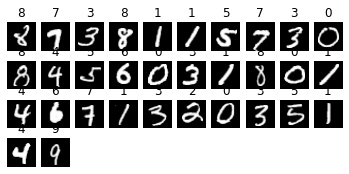

In [5]:
plt.figure(figsize=(6, 7))
for i in range(32):
    plt.subplot(10, 10, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

### Часть 1: MNIST
Обучите полносвязную нейронную сеть с архитектурой 784-100-100-10 и сигмоидой в качестве нелинейности. Какую точность классификации удалось получить? Нарисуйте график сходимости на обучающей и тестовой выборках. В качестве темпа обучения (learning rate) возьмите 0.01

In [6]:
#activation = ReLU()
activation = Sigmoid()

inner_dim = 64

layers = [Linear(784, inner_dim), activation]
for i in range(1):
    layers.extend([Linear(inner_dim, inner_dim), activation])

layers.append(Linear(inner_dim, 10))

net = NeuralNetwork(layers)
loss = NLLLoss()

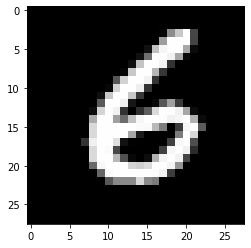

In [7]:
for X, y in train_loader:
    X = X.numpy()
    break
plt.imshow(X[0].reshape(28, 28), cmap=plt.cm.Greys_r)

In [8]:
x = net.forward(X[0].reshape(1, -1))[0]
order = np.argsort(x)[::-1]
print(order, x[order])

[9 8 3 0 4 6 1 5 2 7] [ 0.02481807  0.0225607   0.01898109  0.00398716 -0.00393928 -0.01032538
 -0.01639913 -0.0257035  -0.04280201 -0.08485554]


In [9]:
losses = []

## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    l = loss.forward(res, y)
    
    losses.append(l)
    
    dLdy = loss.backward()
    
    net.backward(dLdy)
    net.step(0.1)

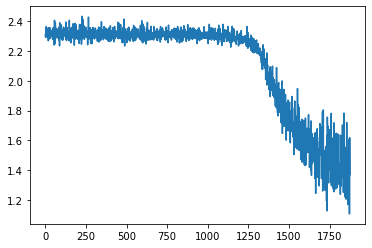

In [10]:
plt.plot(losses)
#plt.plot(sigm_losses)
#plt.plot(good_relu_losses)
plt.show()

In [11]:
good_relu_losses = losses

In [12]:
print(l)

1.369167225610878


### Часть 2: Нелинейности

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

In [13]:
class ReLU:
    def __init__(self):
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.s = (X > 0).astype(float)*X
        return self.s
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        return (self.s > 0).astype(float)*dLdy
    
    def step(self, learning_rate):
        pass

In [14]:
x = np.array([1, 2])
(x > 1.5).astype(float)

array([0., 1.])

### Часть 3: Анализ ошибок
На каких объектах сеть ошибается больше всего?

In [15]:
errors = []

for X, y in test_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    
    for x_i, y_i in zip(X, y):
        l = loss.forward(x_i.reshape(1, -1), y_i.reshape(1, -1))
        errors.append((l, x_i.reshape(28, 28)))
    
    if len(errors) > 1000:
        break

In [16]:
errors.sort(key=lambda x: x[0], reverse=True)

In [17]:
print(errors[18][1])

[[-0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421

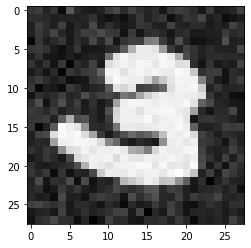

In [18]:
img = np.copy(errors[10][1])
img += np.random.randn(28*28).reshape(28, 28)*0.2
plt.imshow(img, cmap=plt.cm.Greys_r)
#print(errors[1000][0])

### HW1 (1 балл): Реализовать Tanh

In [19]:
class Tanh:
    def __init__(self):
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.s = 2/(1 + np.exp(-2*X)) - 1 
        return self.s
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        self.dLdx = (1 - np.power(self.s , 2))*dLdy
        return self.dLdx
    def step(self, learning_rate):
        pass

In [20]:
activation = Tanh()

inner_dim = 64

layers = [Linear(784, inner_dim), activation]
for i in range(1):
    layers.extend([Linear(inner_dim, inner_dim), activation])

layers.append(Linear(inner_dim, 10))

net = NeuralNetwork(layers)
loss = NLLLoss()

In [21]:
losses = []

## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    l = loss.forward(res, y)
    
    losses.append(l)
    
    dLdy = loss.backward()
    
    net.backward(dLdy)
    net.step(0.1)

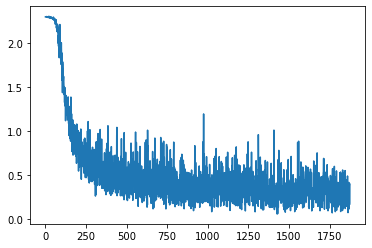

In [22]:
plt.plot(losses)
#plt.plot(sigm_losses)
#plt.plot(good_relu_losses)
plt.show()

Epoch 19... (Train/Test) NLL: 0.030/0.073	Accuracy: 0.994/0.976

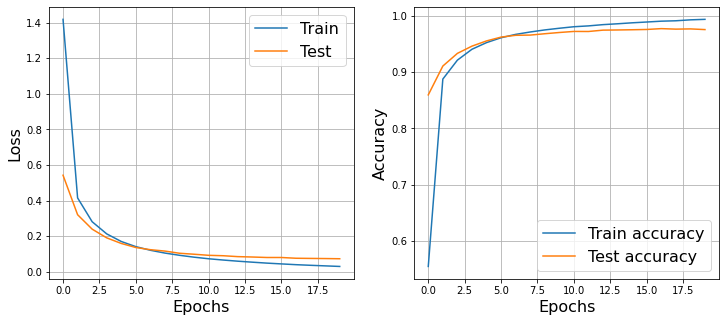

In [73]:
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
accuracy['without_au'] = WithAugumentation(transform)

### Часть 4: Аугментация (HW, 2 балла)
* Небольшие вращения (-15, 15)
* Случайные сдвиги
* Шум

Какой прирост дают эти аугментации вместе и по отдельности

In [37]:
accuracy = {}

In [38]:
def WithAugumentation(transform):
    train_dataset = MNIST('.', train=True, download=True, transform=transform)
    test_dataset = MNIST('.', train=False, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    network = NeuralNetwork([Linear(784, 100), Tanh(),
               Linear(100, 100), Tanh(), Linear(100, 10)])
    loss = NLLLoss()
    
    tr_e, ts_e, tr_ac_e, ts_ac_e = train(network, 20, 0.01, plot=True, verbose=True)
    
    return np.max(tr_ac_e), np.max(ts_ac_e)

Epoch 19... (Train/Test) NLL: 0.029/0.078	Accuracy: 0.994/0.975

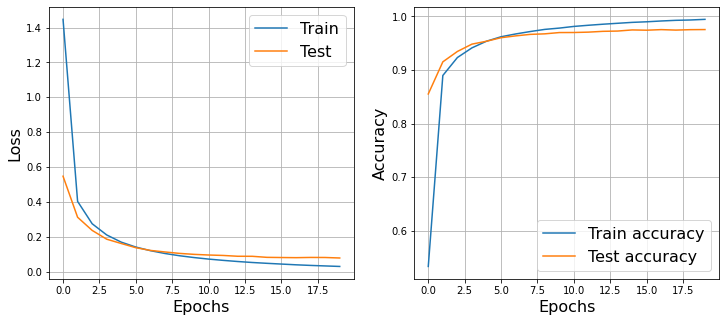

In [48]:
transform = transforms.Compose([
                    transforms.RandomRotation(degrees=(-15,15)),
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
accuracy['small_rotation'] = WithAugumentation(transform)

Epoch 19... (Train/Test) NLL: 0.030/0.078	Accuracy: 0.994/0.978

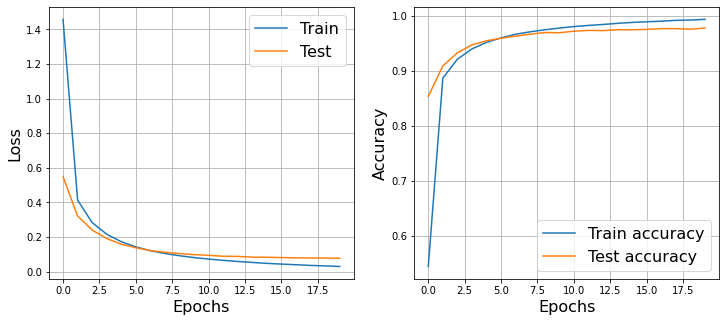

In [50]:
transform = transforms.Compose([
                    transforms.RandomAffine(degrees=(-15,15)),
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
accuracy['random_shifts'] = WithAugumentation(transform)

In [53]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

Epoch 19... (Train/Test) NLL: 0.030/0.079	Accuracy: 0.994/0.975

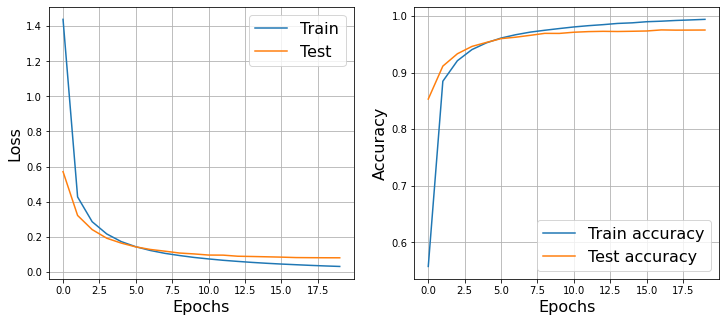

In [54]:

transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,)),
    AddGaussianNoise(0., 1.)
                    ])
accuracy['noise'] = WithAugumentation(transform)

In [58]:
def Withotheractivation(transform, activation):
    train_dataset = MNIST('.', train=True, download=True, transform=transform)
    test_dataset = MNIST('.', train=False, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    network = NeuralNetwork([Linear(784, 100), activation,
               Linear(100, 100), activation, Linear(100, 10)])
    loss = NLLLoss()
    
    tr_e, ts_e, tr_ac_e, ts_ac_e = train(network, 20, 0.01, plot=True, verbose=True)
    
    return np.max(tr_ac_e), np.max(ts_ac_e)


Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

Epoch 19... (Train/Test) NLL: 0.111/0.130	Accuracy: 0.966/0.962

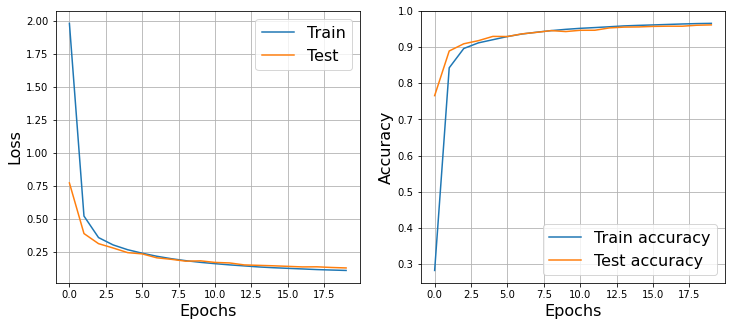

In [70]:
active = {}
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
active['RELU'] = Withotheractivation(transform, ReLU())

In [71]:
class ELU:
    def __init__(self):
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.X = X
        elu = lambda X: np.where(X>0, X, np.exp(X)-1)
        self.s = elu(X)
        return self.s
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        elu_d= lambda X: np.where(X>0, 1*dLdy, np.exp(X)*dLdy)
        self.dLdx = elu_d(self.X)
        return self.dLdx

    
    def step(self, learning_rate):
        pass

Epoch 19... (Train/Test) NLL: 0.089/0.116	Accuracy: 0.973/0.964

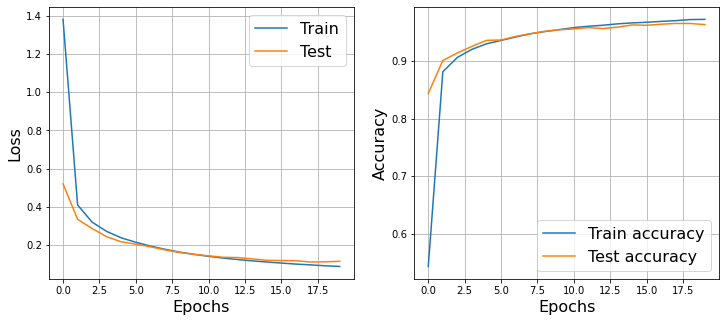

In [72]:
active = {}
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
active['ELU'] = Withotheractivation(transform, ELU())

### Часть 5: Выводы
Опишите полученные результаты: как влияют выбор нелинейности и предобработка данных на скорость сходимости и итоговое качество?

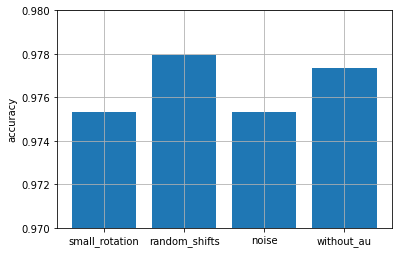

In [74]:
accurancy_test = []
for item in accuracy.values():
    accurancy_test.append(item[1])
plt.bar(list(accuracy.keys()), accurancy_test)
plt.grid()
plt.ylim([0.97, 0.98])
plt.ylabel('accuracy')
plt.show()

In [75]:
#Самый луший результат показал рандомный шум, он единственный смог улучшить точночть предсказания хоть и незначительно,
#  изменение функций активации не дали особого эффекта. По графикам не видн оосбой разницы в сходимости между предобработынными
# и не предобработанными данными. 